<a href="https://colab.research.google.com/github/pachterlab/JBMMCKP_2023/blob/main/notebooks/cdx-stripe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install necessary packages if runnning on colab. 

In [1]:
#!pip install scipy
#!pip install anndata
#!pip install scanpy
#!pip install concordex

In [2]:
import sys, os
import pandas as pd 

import scanpy as sc 
from concordex.tools import calculate_concordex

from scipy.cluster.vq import kmeans2

import warnings
warnings.filterwarnings("ignore")

Data in this example is availabile at the following link: [https://caltech.box.com/v/concordex-data](https://caltech.box.com/v/concordex-data)

Assumes the following file structure:
<pre>
|-- parent  
|   |-- notebooks 
|   |   |-- cdx-libd.ipynb 
|   |-- data 
|   |   |-- stripe 
|   |   |   |-- stripe_processed.h5ad 
|   |   |-- .... 
</pre>

In [3]:
result_name = "stripe"

data_dir = "../data"
full_data_dir = os.path.join(data_dir,result_name)

Load Data

In [4]:
adata = sc.read_h5ad(os.path.join(full_data_dir, 'stripe_processed.h5ad'))

In [5]:
adata

AnnData object with n_obs × n_vars = 14400 × 4946
    obs: 'CellID', 'Group', 'Cell', 'ExpLibSize', 'Matrix_Order', 'spatial_order_0.5', 'stripe_120_30', 'row', 'col', 'Mapped_Color', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'pca', 'pearson_residuals_normalization'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'

In [6]:
adata.var_names_make_unique()
adata.layers["counts"] = adata.X.copy()

In [7]:
# Setup concordex params
n_shrs = 4
label = "X_pca"
use_rep = "spatial"

calculate_concordex(
        adata, label, 
        use_rep=use_rep
)

# Identify SHRs
_, shr = kmeans2(adata.obsm['X_nbc'], n_shrs)
adata.obs['shr'] = pd.Categorical(shr)

Computing nearest neighbors...

Computing neighborhood consolidation matrix...



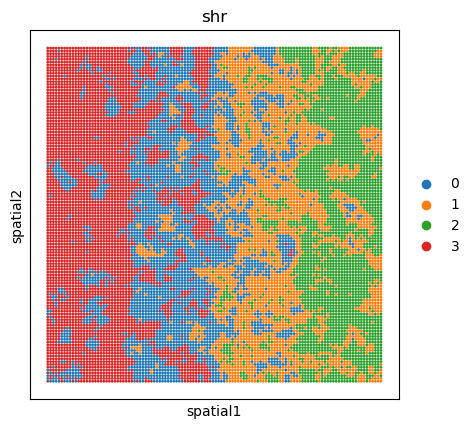

In [8]:
sc.pl.spatial(adata, color='shr', spot_size=1,size=1)

In [9]:
# Using discrete labels...
label = "Group"
calculate_concordex(
        adata, label, 
        use_rep=use_rep
)

_, shr = kmeans2(adata.obsm['X_nbc'], n_shrs,minit='points')
adata.obs['shr'] = pd.Categorical(shr)

Computing nearest neighbors...

Computing neighborhood consolidation matrix...



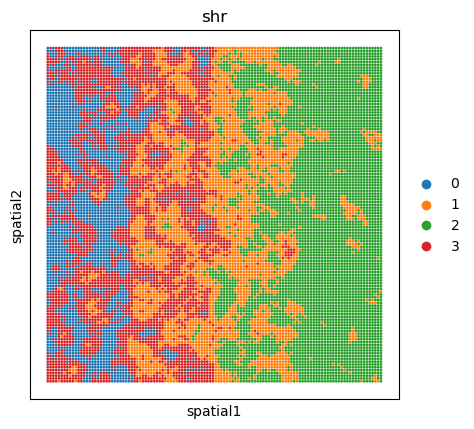

In [10]:
sc.pl.spatial(adata, color='shr', spot_size=1,size=1)